<a href="https://colab.research.google.com/github/robertopsouto/NWP-Python-Jul-2021/blob/main/INPE_NWP_Out2023_resumido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CURSO: PROGRAMAÇÃO EM PYTHON PARA A AQUISIÇÃO, PROCESSAMENTO E VISUALIZAÇÃO DE DADOS DE MODELOS DE PREVISÃO NUMÉRICA DO TEMPO (PNT)**
15 e 22 de Julho de 2021

### **Contato:** Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)

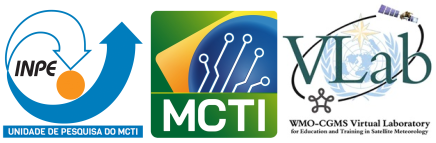

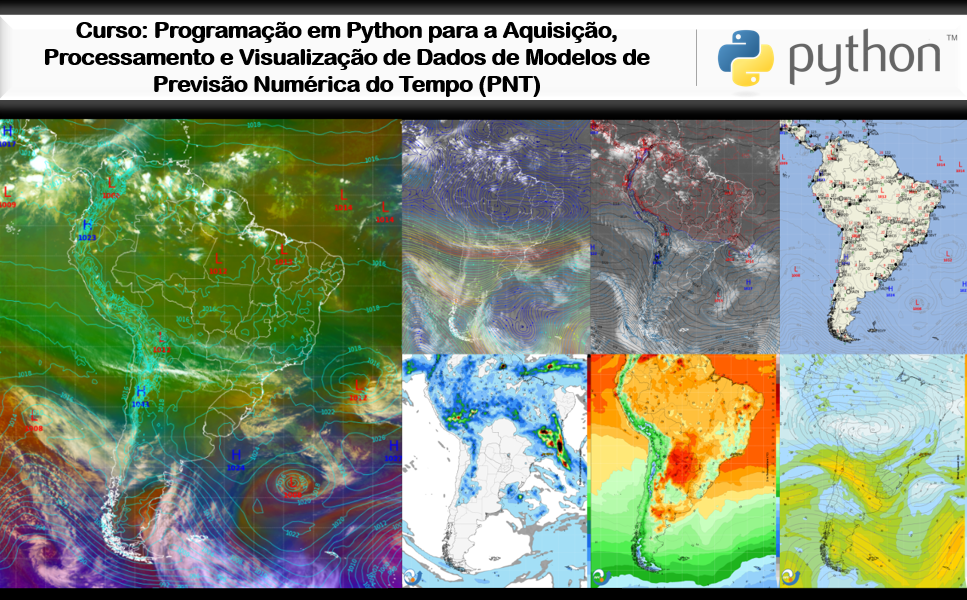

# Introdução

Bem vindos ao curso **"Processamento de Dados de Modelo com Python"**!


---


Este "notebook" interativo contém instruções para a instalação das ferramentas necessárias para a criação de scripts Python para a manipulação dos dados mostrados no curso. Todas as instruções e scripts são executados na nuvem, não sendo necessário instalar as ferramentas e baixar arquivos localmente. Para executar as instruções, clicar no ícone "Play" entre colchetes à esquerda de cada célula.

# 1° Passo: Verificando as Configurações da Máquina Virtual

Neste passo verificamos a configuração da máquina e a versão Python instalada.

In [1]:
# Verificando configuração da máquina
!cat /etc/issue
!uname -a
print('\n')

# Verificando a memória
!grep MemTotal /proc/meminfo
print('\n')

# Verificando o HD
!df -h
print('\n')

# Verificando qual o diretório da instalação padrão do Python
!which python
print('\n')

# Verificando qual a versão instalada do Python
!python --version
print('\n')

Ubuntu 22.04.2 LTS \n \l

Linux b3e9a64483fa 5.15.120+ #1 SMP Wed Aug 30 11:19:59 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


MemTotal:       13294200 kB


Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   28G  199G  12% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  2.4M  6.4G   1% /var/colab
/dev/sda1       235G   28G  207G  12% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


/usr/local/bin/python


Python 3.10.12




# 2° Passo: Instalando as Bibliotecas Necessárias

Neste passo instalamos as bibliotecas necessárias para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **Pygrib:** Ler os dados de modelo
*   **Cartopy:** Adicionar mapas aos plots
*   **MetPy:** Adicionar dados METAR
*   **Boto3:** Baixar dados de satélite da nuvem
*   **NetCDF4:** Ler os dados de satélite
*   **GDAL:** Reprojetar os dados de satélite para a mesma projeção dos dados de modelo


In [2]:
# Instalando a Biblioteca Pygrib
!pip install pygrib
print('\n')

# Instalando a Biblioteca Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force
print('\n')

# Instalando a Biblioteca MetPy
!pip install MetPy
print('\n')

# Instalando a Biblioteca Boto3
!pip install boto3
print('\n')

# Instalando a Biblioteca NetCDF4
!pip install netcdf4
print('\n')

# Instalando / atualizando a Biblioteca GDAL
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa
!apt-get install gdal-bin
!pip install 'gdal==3.0.4'
print('\n')

# Install ImageMagick
!sudo apt install imagemagick
print('\n')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 28.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.3 MB/s eta 0:00:00
  Created wheel for shapely: filename=shapely-2.0.2-cp310-cp310-linux_x86_64.whl size=1026898 sha256=edc5a401c91c6c6b4cefd930ace8c7d4ca00436b639879965759ceac96f6ea96
  Stored in directory: /root/.cache/pip/wheels/1f/6b/52/14cb4558cddc0fd89de08f0e1fd08f816f4f3e1969311377c6
Successfully built shapely
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: shapely
    Found ex

# 3° Passo: Baixando Arquivos Auxiliares

Neste passo vamos baixar alguns arquivos auxiliares, necessários para parte dos scripts que serão demonstrados no curso:

*   **br_unidades_da_federacao.zip:** Shapefile com os estados brasileiros
*   **ne_10m_admin_1_states_provinces.zip:** Shapefile com os estados e províncias mundiais
*   **utilities.py:** Script com algumas funções para processamento de dados de satélite
*   **IR4AVHRR6.cpt:** Paleta de cores para canais infravermelhos do GOES-16


In [3]:
# Baixando o shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
print('\n')

# Download do script "utilities.py", do curso de processamento de satélites, com algumas funções que facilitam a manipulação de dados de satélite
!wget -c https://www.dropbox.com/s/i8j1g9xg1g7o56l/utilities.py
print('\n')

# Download da arquivo CPT exemplo (para realce de canais IR)
!wget -c https://www.dropbox.com/s/fdgnaqt91cy3x97/IR4AVHRR6.cpt
print('\n')

# Download da arquivo CPT exemplo (para realce de canais WV)
!wget -c https://www.dropbox.com/s/4l9fys6pv5c68xk/SVGAWVX_TEMP.cpt
print('\n')

--2023-10-21 22:21:38--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 170.84.40.11
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|170.84.40.11|:443... connected.
OpenSSL: error:0A000152:SSL routines::unsafe legacy renegotiation disabled
Unable to establish SSL connection.


unzip:  cannot find or open br_unidades_da_federacao.zip, br_unidades_da_federacao.zip.zip or br_unidades_da_federacao.zip.ZIP.


--2023-10-21 22:21:39--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/10m/cu

Neste ponto nossas bibliotecas estão instaladas e os arquivos auxiliares estão baixados. Estamos prontos para iniciar o desenvolvimento dos scripts!

# 4° Passo: Download de Dados GFS do Servidor *NOMADS*

Nesse script exemplo, vamos baixar dados diretamente do servidor NOMADS, da NOAA. Nesse script, a data para download (variável "date") está como o dia de hoje, mas pode ser modificada para os 10 últimos dias (formato "YYYYMMDD"). Você também pode escolher a região desejada nas variáveis de lat e lon, a resolução e a rodada desejada. Por último é possível escolher o intervalo de dados, com as variáveis "hour_init" (hora inicial), "hour_end" (hora final) e "hour_int" (intervalo). Ao executar o script, os arquivos serão guardados na pasta "Samples", criada no próprio script.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: NWP Data Processing With Python - NWP Download with Python (GFS)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------

# Required modules
from datetime import datetime        # Basic Dates and time types
import os                            # Miscellaneous operating system interfaces
import requests                      # HTTP library for Python
import time as t                     # Time access and conversion
#-----------------------------------------------------------------------------------------------------------

print('---------------------------------------')
print('GFS Download (NOMADS) - Script started.')
print('---------------------------------------')

# Start the time counter
start_time = t.time()

#-----------------------------------------------------------------------------------------------------------

# Download directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Desired date (last 10 days only!): Format - 'YYYYMMDD'
date = datetime.today().strftime('%Y%m%d')

# Desired extent
min_lon = '-93.00'
max_lon = '-25.00'
min_lat = '-60.00'
max_lat = '18.00'

# Desired resolution: '25' or '50' or '1'
resolution = '50'

# Desired run: '00' or '06' or '12' or '18'
hour_run = '00'

# Desired forecast hours
hour_ini = 0  # Init time
hour_end = 24 # End time
hour_int = 3  # Interval

#-----------------------------------------------------------------------------------------------------------

# Link (select "grib filter" and check "Show the URL only for web programming" to verify the URL's):
# https://nomads.ncep.noaa.gov/

def download_gfs(date, iii):

    # Create the URL's based on the resolution
    if (resolution == '25'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F00%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
    elif (resolution == '50'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2full.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F00%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
    elif (resolution == '1'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_'+resolution+'p00.pl?file=gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F00%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)

    # Print the file name
    print("File name: ", file_name)
    # Sends a GET request to the specified url
    myfile = requests.get(url)

    # Download the file
    open(dir + '//' + file_name, 'wb').write(myfile.content)

#-----------------------------------------------------------------------------------------------------------

# Download loop
for hour in range(hour_ini, hour_end + 1, hour_int):
    print('\n---------------------')
    print('Downloading GFS File:')
    print('---------------------')
    print('Resolution: ' + resolution)
    print('Date: ' + date)
    print('Run: ' + hour_run)
    print('Forecast Hour: f' + str(hour).zfill(3))
    # Call the download function
    download_gfs(date,hour)

#-----------------------------------------------------------------------------------------------------------

# End the time counter
print('\nTotal Processing Time:', round((t.time() - start_time),2), 'seconds.')

# 5° Passo (Opcional): Download de Dados (WRF/ETA/BAM) do Servidor FTP do CPTEC

Nesse script exemplo, vamos baixar dados diretamente do servidor FTP do CPTEC. Nesse script, a data para download (variáveis "year", "month" e "day") está para o dia de hoje, mas pode ser modificada para a data e horários históricos desejados. É possível escolher o modelo desejado (variável "model"), entre "WRF", "ETA" e "BAM". Por último, é possível escolher o intervalo de dados, com as variáveis "hour_init" (hora inicial), "hour_end" (hora final) e "hour_int" (intervalo). Ao executar o script, os arquivos serão guardados na pasta "Samples", criada no próprio script.

**OBSERVAÇÕES IMPORTANTES:**

Os plots dos arquivos **WRF** podem ser executados sem maiores modificações no scripts exemplo, que originalmente utilizam dados do **GFS**.

Para rodar os plots utilizando arquivos do **ETA**, são necessárias duas modificações em relação aos exemplos:

**1-)** Não é necessário somar 360 nas instruções de leitura do campo, como no seguinte exemplo:

*tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])*

**2-)** Comentar as seguintes linhas (colocando "#" antes dos comandos):

*ftime = str(grb.forecastTime)*

*print('Forecast: +' + ftime)*

Já para rodar os plots utilizando arquivos do **BAM**, são necessárias três modificações em relação aos exemplos:

**1-)** Além de somar 360 às longitudes, é necessário subtrair 180 das latitudes nas instruções de leitura do campo, como no seguinte exemplo:

*tmtmp, lats, lons = grb.data(lat1=extent[1]-180,lat2=extent[3]-180,lon1=extent[0]+360,lon2=extent[2]+360)*

**2-)** Comentar as seguintes linhas (colocando "#" antes dos comandos):

*ftime = str(grb.forecastTime)*

*print('Forecast: +' + ftime)*

**3-)** É necessário inverter o eixo y, como no seguinte exemplo:

*import numpy as np*

*tmtmp = np.flipud(tmtmp)*

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: NWP Data Processing With Python - NWP Download with Python (CPTEC FTP - WRF, ETA, BAM)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from datetime import datetime, timedelta # Basic Dates and time types
import os                                # Miscellaneous operating system interfaces
import time as t                         # Time access and conversion
from ftplib import FTP                   # FTP protocol client
#-----------------------------------------------------------------------------------------------------------

print('------------------------------------')
print('CPTEC FTP Download - Script started.')
print('------------------------------------')

# Start the time counter
start_time = t.time()

# Data description:

# WRF: GRIB2 / ~250 MB / 5 km  / Lats: -55,75 ~ +14,3 / Lons: 276,25 ~ +350,0 / 1h interval + 03 days / Since Feb 08, 2019
# Example FTP link
# http://ftp.cptec.inpe.br/modelos/tempo/WRF/ams_05km/brutos/2021/05/15/00/
# Example file name
# WRF_cpt_05KM_2021051500_2021051500.grib2

# ETA: GRIB1 / ~12 MB  / 40 km / Lats: -50,2 ~ +12,20 / Lons: -83,00001 ~ -25,79 / 1 hour interval + 10 days / Since Jul 08, 2020
# Example FTP link
# http://ftp.cptec.inpe.br/modelos/tempo/Eta/ams_40km/brutos/2021/05/15/00/
# Example file name
# eta_40km_2021051600+2021051600.grb

# BAM: GRIB1 / ~1.5 GB / 20 km / Lats: -90,00001 ~ +90,00001 / Lons: 0.00 ~ +359,82 / 6 h interval + 10 days / Since Jul 01, 2018
# Example FTP link
# http://ftp.cptec.inpe.br/modelos/tempo/BAM/TQ0666L064/brutos/2021/05/15/00/
# Example file name
# GPOSNMC20210516002021052000P.fct.TQ0666L064.grb

#-----------------------------------------------------------------------------------------------------------

# Download directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Select model
model = 'WRF' # options: 'WRF', 'ETA', 'BAM'

# Desired year (four digit)
year = datetime.today().strftime('%Y') # This will get the current year (four digit)
# Or, select the year you want
#year = '2021'

# Desired month (two digit)
month = datetime.today().strftime('%m') # This will get the current month (two digit)
# Or, select the month you want
#month = '05'

# Desired day (two digit)
day = datetime.today().strftime('%d') # This will get the current day (two digit)
# Or, select the day you want
#day = '15'

# Desired run
run = '00'

# Desired forecast hours
hour_ini = 0  # Init time
hour_end = 0  # End time
hour_int = 1  # Interval

#-----------------------------------------------------------------------------------------------------------

# Create the run date for later use
date_run = datetime.strptime(year + month + day + run, '%Y%m%d%H')
date_run_string = date_run.strftime('%Y%m%d%H')

# FTP Address
ftp = FTP('ftp.cptec.inpe.br')

# FTP Credentials
ftp.login('', '')

# Access the FTP folder, based on the desired model
if (model == 'WRF'):
    # FTP Path
    path = ('modelos/tempo/WRF/ams_05km/brutos/' + year + '/' + month + '/' + day + '/' + run + '/')
elif (model == 'ETA'):
    # FTP Path
    path = ('modelos/tempo/Eta/ams_40km/brutos/' + year + '/' + month + '/' + day + '/' + run + '/')
elif (model == 'BAM'):
    # FTP Path
    path = ('modelos/tempo/BAM/TQ0666L064/brutos/' + year + '/' + month + '/' + day + '/' + run + '/')

# Enter the FTP Path
ftp.cwd(path)

#-----------------------------------------------------------------------------------------------------------

# Download loop
for hour in range(hour_ini, hour_end + 1, hour_int):

    # Get the download file name
    date_forecast = (date_run + timedelta(hours=hour)).strftime('%Y%m%d%H')

    # File name creation, based on the desired model
    if (model == 'WRF'):
        # File Name
        file_name = 'WRF_cpt_05KM_' + date_run_string + '_' + date_forecast + '.grib2'
    elif (model == 'ETA'):
        # File Name
        file_name = 'eta_40km_' + date_run_string + '+' + date_forecast + '.grb'
    elif (model == 'BAM'):
        # File Name
        file_name = 'GPOSNMC' + date_run_string + date_forecast + 'P.fct.TQ0666L064.grb'

    print('\n---------------------')
    print('Downloading FTP File:')
    print('---------------------')
    print('Model: ' + model)
    print('Date: ' + date_run_string)
    print('Run: ' + run)
    print('Forecast Hour: ' + date_forecast)
    print('File Name: ' + file_name)

    # Download the file
    ftp.retrbinary("RETR " + file_name, open(dir + '//' + file_name, 'wb').write)

# Quit the FPT connection
ftp.quit()

#-----------------------------------------------------------------------------------------------------------

# End the time counter
print('\nTotal Processing Time:', round((t.time() - start_time),2), 'seconds.')

# Script 1: Conhecendo as Variáveis Disponíveis em um Arquivo

Neste script, vamos verificar quais são as variáveis disponíveis dentro de um dos arquivos baixados no script anterior. Conhecendo as variáveis, poderemos prosseguir com os demais scripts. As variáveis serão guardadas em um arquivo de texto, chamado "gfs_variables.txt" e também serão mostradas no terminal interativo.

In [4]:
#---------------------------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: NWP Data Processing With Python - Script 1: Knowing the Available Variables
# Author: Diego Souza
#---------------------------------------------------------------------------------------------------------------------------
# Required modules
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
#---------------------------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open('gfs.0p25.2018060100.f000.grib2')

# Print all variables in the terminal and save them in a text file
f = open("variables.txt", "w")
for variables in grib:
    # Print the variables in the terminal
    print(variables)
    # Put the variables in the text file
    print(variables, file=f)
f.close()

1:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201806010000
2:U component of wind:m s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 201806010000
3:V component of wind:m s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 201806010000
4:Ventilation Rate:m**2 s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 201806010000
5:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201806010000
6:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100.0 Pa:fcst time 0 hrs:from 201806010000
7:Temperature:K (instant):regular_ll:isobaricInhPa:level 100.0 Pa:fcst time 0 hrs:from 201806010000
8:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100.0 Pa:fcst time 0 hrs:from 201806010000
9:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100.0 Pa:fcst time 0 hrs:from 201806010000
10:V component of wind:m s**-1 (insta

# Script 2: Plot Básico



Uma vez que conhecemos as variáveis ("datasets") disponíveis no arquivo GRIB, vamos crirar um plot básico de uma destas variáveis (temperatura em 2 metros). O plot será salvo em uma imagem PNG e também será mostrado no terminal interativo.

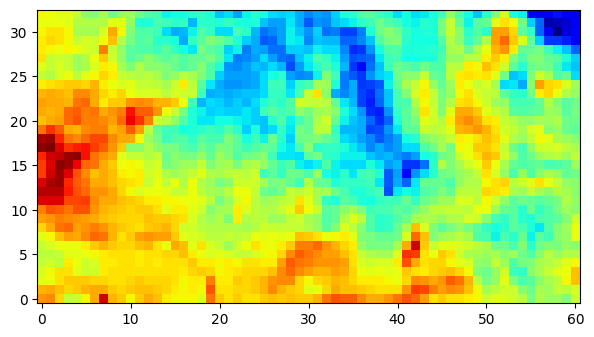

In [7]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 2: Basic Plot
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("gfs.0p25.2018060100.f000.grib2")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-60.00, -11.00, -45.00, -03.00]

# Read the data for the selected extent
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))

# Plot the image
plt.imshow(tmtmp, origin='lower', cmap='jet')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_2.png')

# Show the image
plt.show()


# Script 3: Metadados, Cálculo Básico, Paleta de Cores, Legenda e Título

Neste script vamos ler alguns dados do cabeçalho do arquivo, fazer um cálculo básico (de K para °C), e adicionar alguns itens ao nosso plot, como legenda e título.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 3: Basic Operation / Color Palettes / Colorbar / Title / Date
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Plot the image
plt.imshow(tmtmp, origin='lower', cmap='rainbow')

# Add a colorbar
plt.colorbar(label='2 m Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_3.png')

# Show the image
plt.show()

# Script 4: Adicionando Mapas com a Cartopy


Neste script vamos adicionar mapas utilizando a biblioteca Cartopy. Para isto, precisamos importar a biblioteca, definir a projeção "Plate Carree" (como a Cartopy chama a projeção cilindrica equidistante), definir a região e chamar as instruções que adicionam os mapas.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 4: Adding a Map with Cartopy
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt      # Plotting library
import cartopy, cartopy.crs as ccrs  # Plot maps
import numpy as np                   # Scientific computing with Python
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent [min. lon, max. lon, min. lat, max. lat]
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_4.png')

# Show the image
plt.show()

# Script 5: Adicionando Shapefiles

Os mapas adicionados com a Cartopy são um tanto limitados. Existe a possibilidade de adicionar shapefiles com a Cartopy, como vamos ver neste script.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 5: Adding a Shapefile
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
#shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
# or
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
shapefile = list(shpreader.Reader('ne_10m_admin_1_states_provinces.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_5.png')

# Show the image
plt.show()

# Script 6: Plotando Contornos e "Labels"

Neste script vamos realizar o mesmo plot, porém utilizando contornos. Veremos como definir os limiares, intervalos, e configurar a aparência do nosso plot.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 6: Plotting Contours and Labels
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap='jet', levels=levels, extend='both')
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'blue')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_6.png')

# Show the image
plt.show()

# Script 7: Paletas de Cores Personalizadas

As "colormaps" padrão do Python, apesar de variadas, muitas vezes não são adequadas para uma determinada aplicação. Neste script vamos ver como criar uma paleta personalizada.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 7: Custom Color Palettes
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
# The reference color palette may be found at the following page: http://wxmaps.org/pix/temp8
# You may get the hex files st the following page: https://imagecolorpicker.com/
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_7.png')

# Show the image
plt.show()

# Script 8: Suavizando os Contornos

Neste script vemos como suavizar os contornos dos plots utilizando o comando "zoom" a biblioteca "scipy". Basicamente aumentamos o tamanho da array "x" vezes, realizando uma interpolação.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 8: Smoothing the Contours
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='2 metre temperature')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-60.0, -30.00, -40.00, -10.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Convert from K to °C
tmtmp = tmtmp - 273.15

print("\nArray dimensions before smoothing:")
print(tmtmp.shape)

# Smooth the contours
import scipy.ndimage
tmtmp = scipy.ndimage.zoom(tmtmp, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

print("Array dimensions after smoothing:")
print(tmtmp.shape)
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')
img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()

# Script 9: Trabalhando com Diversos Arquivos

Neste exemplo vamos aprender como trabalhar com diversos arquivos utilizando o mesmo script:


In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 9: Working With Multiple Files
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-78.0, -40.00, -30.00, 12.00]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
file = "Samples/gfs.t00z.pgrb2.0p50.f"

# Data you want to process in the loop
# (to process only the analisys, end and inc should be equal).
hour_ini = 0   # Init time
hour_end = 24  # End time
hour_int = 3   # Interval

for hour in range(hour_ini, hour_end + 1, hour_int):

    grib = file + str(hour).zfill(3)

    # If the file exists
    if (os.path.exists(grib)):

        # Process the file
        print("\nProcessing file: ", grib)

        # Read the GRIB file
        grib = pygrib.open(grib)

        # Select the variable
        grb = grib.select(name='2 metre temperature')[0]

        # Get information from the file
        init  = str(grb.analDate)      # Init date / time
        run   = str(grb.hour).zfill(2) # Run
        ftime = str(grb.forecastTime)  # Forecast hour
        valid = str(grb.validDate)     # Valid date / time
        print('Init: ' + init + ' UTC')
        print('Run: ' + run + 'Z')
        print('Forecast: +' + ftime)
        print('Valid: ' + valid + ' UTC')

        # Read the data for a specific region
        tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        #-----------------------------------------------------------------------------------------------------------
        # Convert from K to °C
        tmtmp = tmtmp - 273.15

        # Smooth the contours
        import scipy.ndimage
        tmtmp = scipy.ndimage.zoom(tmtmp, 3)
        lats = scipy.ndimage.zoom(lats, 3)
        lons = scipy.ndimage.zoom(lons, 3)

        #-----------------------------------------------------------------------------------------------------------
        # Choose the plot size (width x height, in inches)
        plt.figure(figsize=(13,13))

        # Use the Cilindrical Equidistant projection in cartopy
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Define the image extent
        img_extent = [extent[0], extent[2], extent[1], extent[3]]

        # Add a shapefile
        # https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
        shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
        ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

        # Add coastlines, borders and gridlines
        ax.coastlines(resolution='10m', color='black', linewidth=0.8)
        ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False

        # Define de contour interval
        data_min = -20
        data_max = 48
        interval = 2
        levels = np.arange(data_min,data_max,interval)

        # Create a custom color palette
        colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
        "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
        "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
        "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
        "#8c6359", "#b48b82", "#e1beb4"]
        cmap = matplotlib.colors.ListedColormap(colors)
        cmap.set_over('#fadad5')
        cmap.set_under('#e5e5e5')

        # Plot the contours
        img1 = ax.contourf(lons, lats, tmtmp, cmap=cmap, levels=levels, extend='both')
        img2 = ax.contour(lons, lats, tmtmp, colors='white', linewidths=0.3, levels=levels)
        ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

        # Add a colorbar
        plt.colorbar(img1, label='2 m Temperature (°C)', orientation='vertical', pad=0.05, fraction=0.05)

        # Add a title
        plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
        plt.title('Valid: ' + valid, fontsize=10, loc='right')
        #-----------------------------------------------------------------------------------------------------------

        # Save the image
        plt.savefig('image_loop_' + str(hour) + '.png', bbox_inches='tight', pad_inches=0, dpi=100)

        # Show the image
        plt.show()

# Script 10: Criando uma Animação

Neste exemplo vamos utilizar a biblioteca "imageio" para criar uma animação com as imagens geradas no script anterior.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 10: Creating an Animation
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import imageio        # Python interface to read and write a wide range of image data

# Images we want to include in the GIF
files = ['image_loop_0.png', 'image_loop_3.png', 'image_loop_6.png', 'image_loop_9.png', 'image_loop_12.png',
         'image_loop_15.png', 'image_loop_18.png', 'image_loop_21.png', 'image_loop_24.png']

# Create the GIF
images = []
for file in files:
    images.append(imageio.imread(file))
imageio.mimsave('animation.gif', images, fps=1)

# Open the GIF
print("\nOpening the GIF..\n")
from IPython.display import Image
Image(open('animation.gif','rb').read())

# Script 11: Médias, Máximos e Mínimos - Múltiplos Plots Simultâneos

Neste exemplo vamos adicionar algumas operações no loop e ver um exemplo de como criar multiplos plots em uma mesma imagem.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 11: Average, Maximuns and Minimuns
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
import os                                  # Miscellaneous operating system interfaces
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-78.0, -40.00, -30.00, 12.00]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
file = "Samples/gfs.t00z.pgrb2.0p50.f"

# Data you want to process
hour_ini = 0   # Init time
hour_end = 24  # End time
hour_int = 3   # Increment

for hour in range(hour_ini, hour_end + 1, hour_int):

    grib = file + str(hour).zfill(3)

    # If the file exists
    if (os.path.exists(grib)):

        # Process the file
        print("\nProcessing file: ", grib)

        # Read the GRIB file
        grib = pygrib.open(grib)

        # Select the variable
        grb = grib.select(name='2 metre temperature')[0]

        # Get information from the file
        init  = str(grb.analDate)      # Init date / time
        run   = str(grb.hour).zfill(2) # Run
        ftime = str(grb.forecastTime)  # Forecast hour
        valid = str(grb.validDate)     # Valid date / time
        print('Init: ' + init + ' UTC')
        print('Run: ' + run + 'Z')
        print('Forecast: +' + ftime)
        print('Valid: ' + valid + ' UTC')

        # Read the data for a specific region
        tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        #-----------------------------------------------------------------------------------------------------------

        # Convert from K to °C
        tmtmp = tmtmp - 273.15

        # Smooth the contours
        import scipy.ndimage
        tmtmp = scipy.ndimage.zoom(tmtmp, 3)
        lats = scipy.ndimage.zoom(lats, 3)
        lons = scipy.ndimage.zoom(lons, 3)

        # If it is the first cycle, create the arrays that will store the average values
        if (hour == hour_ini):
            tmtmp_sum = np.zeros((tmtmp.shape[0],tmtmp.shape[1]))
            tmtmp_max = np.full((tmtmp.shape[0],tmtmp.shape[1]),-9999)
            tmtmp_min = np.full((tmtmp.shape[0],tmtmp.shape[1]), 9999)

        # Sum the values
        tmtmp_sum = tmtmp_sum + tmtmp

        # Keep the maximuns
        tmtmp_max = np.maximum(tmtmp,tmtmp_max)

        # Keep the minimuns
        tmtmp_min = np.minimum(tmtmp,tmtmp_min)

# Calculate the average
tmtmp_avg = tmtmp_sum / ((hour_end - hour_ini) / hour_int)

print("\nAverage, Min and Max values stored!")

Com os valores mínimos e máximos obtidos, podemos realizar os plots de ambas as variáveis (continue a execução do script, dando "Play" na célula abaixo)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# Create a custom color palette
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0",
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c",
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c",
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046",
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')
#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(1,3, figsize=(25,25), sharex = False, sharey = False, subplot_kw=dict(projection=ccrs.PlateCarree())) # 1 row x 3 columns

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img1 = axs[0].contourf(lons, lats, tmtmp_min, cmap=cmap, levels=levels, extend='both')
img2 = axs[0].contour(lons, lats, tmtmp_min, colors='white', linewidths=0.3, levels=levels)
#axs[0].clabel(img2, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[0])

# Add a title
axs[0].set_title('GFS: 2 m Temperature - 24h Minimum' , fontweight='bold', fontsize=10, loc='left')
axs[0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = axs[1].contourf(lons, lats, tmtmp_max, cmap=cmap, levels=levels, extend='both')
img4 = axs[1].contour(lons, lats, tmtmp_max, colors='white', linewidths=0.3, levels=levels)
#axs[1].clabel(img3, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img3, label='2 m Temperature (°C)', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[1])

# Add a title
axs[1].set_title('GFS: 2 m Temperature - 24h Maximum' , fontweight='bold', fontsize=10, loc='left')
axs[1].set_title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[2].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[2].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[2].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[2].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[2].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = axs[2].contourf(lons, lats, tmtmp_avg, cmap=cmap, levels=levels, extend='both')
img4 = axs[2].contour(lons, lats, tmtmp_avg, colors='white', linewidths=0.3, levels=levels)
#axs[2].clabel(img3, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img3, label='2 m Temperature (°C)', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[2])

# Add a title
axs[2].set_title('GFS: 2 m Temperature - 24h Average' , fontweight='bold', fontsize=10, loc='left')
axs[2].set_title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_11.png')

# Show the image
plt.show()

# Script 12: Precipitação Instantânea e Precipitação Acumulada

Neste script vamos criar plots de precipitação instantânea e precipitação acumulada.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 12: Precipitation
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f024")

#-----------------------------------------------------------------------------------------------------------

# Read the instant precip
grb = grib.select(name='Precipitation rate', typeOfLevel = 'surface')[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

#-----------------------------------------------------------------------------------------------------------

# Read the data for a specific region
precip, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert from kg m**-2 s**-1 to mm/h
precip = precip * 60 * 60

# Smooth the contours
import scipy.ndimage
precip = scipy.ndimage.zoom(precip, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

# Remove values lower than 0.1
precip[precip < 0.1] = np.nan

#-----------------------------------------------------------------------------------------------------------

# Select the variable
totpr = grib.select(name='Total Precipitation', typeOfLevel = 'surface')[1]

# Read the data for a specific region
totpr = totpr.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Smooth the contours
totpr = scipy.ndimage.zoom(totpr, 3)

# Remove values lower than 1.0
totpr[totpr < 1.0] = np.nan

#-----------------------------------------------------------------------------------------------------------

# Create a custom color palette
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2",
          "#0fa00f", "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa",
          "#ffe978", "#ffc13c", "#ffa200", "#ff6200", "#ff3300", "#ff1500",
          "#c00100", "#a50200", "#870000", "#653b32"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#000000')
cmap.set_under('#ffffff')

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(1,2, figsize=(20,20), sharex = False, sharey = False, subplot_kw=dict(projection=ccrs.PlateCarree())) # 1 row x 2 columns

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a background image
import cartopy.feature as cfeature
land = axs[0].add_feature(cfeature.LAND, facecolor='whitesmoke')
ocean = axs[0].add_feature(cfeature.OCEAN, facecolor='white')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 0.1
data_max = 50
interval = 1
levels = np.arange(data_min,data_max + interval,interval)

# Plot the contours
img1 = axs[0].contourf(lons, lats, precip, cmap=cmap, levels=levels, extend='max')
img2 = axs[0].contour(lons, lats, precip, colors='white', linewidths=0.3, levels=levels)

# Define the ticks to be shown
ticks = [0.1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Add a colorbar
plt.colorbar(img1, label='Instant Precipitation Rate (mm/h)', orientation='horizontal', pad=0.02, fraction=0.05, ticks=ticks, ax=axs[0])

# Add a title
axs[0].set_title('GFS: Instant Precipitation Rate (mm/h)' , fontweight='bold', fontsize=10, loc='left')
axs[0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a background image
import cartopy.feature as cfeature
land = axs[1].add_feature(cfeature.LAND, facecolor='whitesmoke')
ocean = axs[1].add_feature(cfeature.OCEAN, facecolor='white')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 0.1
data_max = 100
interval = 5
levels = np.arange(data_min,data_max + interval,interval)

# Plot the contours (high values)
img3 = axs[1].contourf(lons, lats, totpr, cmap=cmap, levels=levels, extend='max')
img4 = axs[1].contour(lons, lats, totpr, colors='white', linewidths=0.3, levels=levels)

# Define the ticks to be shown
ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Add a colorbar
plt.colorbar(img3, label='Total Precipitation (mm - 24h)', orientation='horizontal', pad=0.02, fraction=0.05,  ticks=ticks, ax=axs[1])

# Add a title
axs[1].set_title('GFS: Total Precipitation (mm - 24h)' , fontweight='bold', fontsize=10, loc='left')
axs[1].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_12.png')

# Show the image
plt.show()

# Script 13: Lendo Campos Especificando o Nível - Linhas de Corrente

Neste script vamos aprender a ler os campos de interesse especificando o nível (em hPa). Também pela primeira vez, vamos realizar um cálculo utilizando dois campos, além de criar um plot de linhas de corrente.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 13: Choosing Fields by Levels - Streamlines
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Get information from the file
init  = str(ucomp.analDate)      # Init date / time
run   = str(ucomp.hour).zfill(2) # Run
ftime = str(ucomp.forecastTime)  # Forecast hour
valid = str(ucomp.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 0
data_max = 60
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e",
          "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

# Plot the contours
img1 = ax.contourf(lons, lats, ws, cmap=cmap, levels=levels, extend='both')
img2 = ax.contour(lons, lats, ws, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img3 = Axes.streamplot(ax, lons, lats, ucomp, vcomp, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img1, label='Isotachs (kt)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Streamlines and Isotachs (250 hPa)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_13.png')

# Show the image
plt.show()

# Script 14: Animando as Linhas de Corrente

Neste script vamos fzer o mesmo pot do script anterior, mas neste exemplo vamos gerar um GIF, animando as linhas de corrente, usando as funções encontradas no seguinte GitHub: https://github.com/rougier/windmap

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 14: Animating Streamlines
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt                            # Plotting library
import cartopy, cartopy.crs as ccrs                        # Plot maps
import cartopy.io.shapereader as shpreader                 # Import shapefiles
import numpy as np                                         # Scientific computing with Python
import matplotlib                                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
import tqdm                                                # A Fast, Extensible Progress Bar for Python and CLI
from matplotlib.animation import FuncAnimation, writers    # The easiest way to make a live animation in matplotlib
from matplotlib.collections import LineCollection          # Allows one to plot multiple lines on a figure
#-----------------------------------------------------------------------------------------------------------

class Streamlines(object):
    """
    Copyright (c) 2011 Raymond Speth.
    Permission is hereby granted, free of charge, to any person obtaining a
    copy of this software and associated documentation files (the "Software"),
    to deal in the Software without restriction, including without limitation
    the rights to use, copy, modify, merge, publish, distribute, sublicense,
    and/or sell copies of the Software, and to permit persons to whom the
    Software is furnished to do so, subject to the following conditions:
    The above copyright notice and this permission notice shall be included in
    all copies or substantial portions of the Software.
    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
    FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
    DEALINGS IN THE SOFTWARE.
    See: http://web.mit.edu/speth/Public/streamlines.py
    """

    def __init__(self, X, Y, U, V, res=1.00,
                 spacing=4, maxLen=1000, detectLoops=False):
        """
        Compute a set of streamlines covering the given velocity field.
        X and Y - 1D or 2D (e.g. generated by np.meshgrid) arrays of the
                  grid points. The mesh spacing is assumed to be uniform
                  in each dimension.
        U and V - 2D arrays of the velocity field.
        res - Sets the distance between successive points in each
              streamline (same units as X and Y)
        spacing - Sets the minimum density of streamlines, in grid points.
        maxLen - The maximum length of an individual streamline segment.
        detectLoops - Determines whether an attempt is made to stop extending
                      a given streamline before reaching maxLen points if
                      it forms a closed loop or reaches a velocity node.
        Plots are generated with the 'plot' or 'plotArrows' methods.
        """

        self.spacing = spacing
        self.detectLoops = detectLoops
        self.maxLen = maxLen
        self.res = res

        xa = np.asanyarray(X)
        ya = np.asanyarray(Y)
        self.x = xa if xa.ndim == 1 else xa[0]
        self.y = ya if ya.ndim == 1 else ya[:,0]
        self.u = U
        self.v = V
        self.dx = (self.x[-1]-self.x[0])/(self.x.size-1) # assume a regular grid
        self.dy = (self.y[-1]-self.y[0])/(self.y.size-1) # assume a regular grid
        self.dr = self.res * np.sqrt(self.dx * self.dy)

        # marker for which regions have contours
        self.used = np.zeros(self.u.shape, dtype=bool)
        self.used[0] = True
        self.used[-1] = True
        self.used[:,0] = True
        self.used[:,-1] = True

        # Don't try to compute streamlines in regions where there is no velocity data
        for i in range(self.x.size):
            for j in range(self.y.size):
                if self.u[j,i] == 0.0 and self.v[j,i] == 0.0:
                    self.used[j,i] = True

        # Make the streamlines
        self.streamlines = []
        while not self.used.all():
            nz = np.transpose(np.logical_not(self.used).nonzero())
            # Make a streamline starting at the first unrepresented grid point
            self.streamlines.append(self._makeStreamline(self.x[nz[0][1]],
                                                         self.y[nz[0][0]]))


    def _interp(self, x, y):
        """ Compute the velocity at point (x,y) """
        i = (x-self.x[0])/self.dx
        ai = i % 1

        j = (y-self.y[0])/self.dy
        aj = j % 1

        i, j = int(i), int(j)

        # Bilinear interpolation
        u = (self.u[j,i]*(1-ai)*(1-aj) +
             self.u[j,i+1]*ai*(1-aj) +
             self.u[j+1,i]*(1-ai)*aj +
             self.u[j+1,i+1]*ai*aj)

        v = (self.v[j,i]*(1-ai)*(1-aj) +
             self.v[j,i+1]*ai*(1-aj) +
             self.v[j+1,i]*(1-ai)*aj +
             self.v[j+1,i+1]*ai*aj)

        self.used[j:j+self.spacing,i:i+self.spacing] = True

        return u,v

    def _makeStreamline(self, x0, y0):
        """
        Compute a streamline extending in both directions from the given point.
        """

        sx, sy = self._makeHalfStreamline(x0, y0, 1) # forwards
        rx, ry = self._makeHalfStreamline(x0, y0, -1) # backwards

        rx.reverse()
        ry.reverse()

        return rx+[x0]+sx, ry+[y0]+sy

    def _makeHalfStreamline(self, x0, y0, sign):
        """
        Compute a streamline extending in one direction from the given point.
        """

        xmin = self.x[0]
        xmax = self.x[-1]
        ymin = self.y[0]
        ymax = self.y[-1]

        sx = []
        sy = []

        x = x0
        y = y0
        i = 0
        while xmin < x < xmax and ymin < y < ymax:
            u, v = self._interp(x, y)
            theta = np.arctan2(v,u)

            x += sign * self.dr * np.cos(theta)
            y += sign * self.dr * np.sin(theta)
            sx.append(x)
            sy.append(y)

            i += 1

            if self.detectLoops and i % 10 == 0 and self._detectLoop(sx, sy):
                break

            if i > self.maxLen / 2:
                break

        return sx, sy

    def _detectLoop(self, xVals, yVals):
        """ Detect closed loops and nodes in a streamline. """
        x = xVals[-1]
        y = yVals[-1]
        D = np.array([np.hypot(x-xj, y-yj)
                      for xj,yj in zip(xVals[:-1],yVals[:-1])])
        return (D < 0.9 * self.dr).any()

def update(frame_no):
    for i in range(len(lines)):
        lengths[i] += 0.05
        colors[i][:] = ((lengths[i]*1.5) % 1)
        lines[i].set_color(colors[i])
    pbar.update()

#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 200)[0]

# Get information from the file
init  = str(ucomp.analDate)      # Init date / time
run   = str(ucomp.hour).zfill(2) # Run
ftime = str(ucomp.forecastTime)  # Forecast hour
valid = str(ucomp.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

# Correct the longitudes from 0 - 360
lons_corr = lons - 360

# Calculate the components
Y, X = lats, lons_corr
U, V = ucomp, vcomp
speed = ws

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig = plt.figure(figsize=(12,12))

# Use the Cilindrical Equidistant projection in cartopy
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define de contour interval
data_min = 0
data_max = 60
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e",
          "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

# Plot the contours
img1 = ax.contourf(lons, lats, ws, cmap=cmap, levels=levels, extend='both', alpha=1.0, zorder = 10)

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3, zorder=14)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8, zorder=15)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5, zorder=16)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.50, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(img1, label='Wind Speed (kt)', orientation='vertical', pad=0.03, fraction=0.05)

# Add a title
plt.title('GFS: Wind Speed (kt) & Direction (250 hPa) - Animation', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

lengths = []
colors = []
lines = []
s = Streamlines(X, Y, U, V)

for streamline in s.streamlines:

    x, y = streamline

    # Points
    points = np.array([x, y]).T.reshape(-1, 1, 2)

    # Segments
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    n = len(segments)

    # Lenghts
    D = np.sqrt(((points[1:] - points[:-1])**2).sum(axis=-1))
    L = D.cumsum().reshape(n,1) + np.random.uniform(0,1)

    # Colors
    C = np.zeros((n,3))
    C[:] = ((L*1.5) % 1)

    # Lines
    line = LineCollection(segments, linewidth=0.5, zorder=13)

    # Append lenghts, colors and lines
    lengths.append(L)
    colors.append(C)
    lines.append(line)
    ax.add_collection(line)

# Plot extent
ax.set_xlim(extent[0],extent[2]), ax.set_xticks([])
ax.set_ylim(extent[1],extent[3]), ax.set_yticks([])
plt.tight_layout()

#-----------------------------------------------------------------------------------------------------------

# Number of frames
n = 30

# Create the animation
animation = FuncAnimation(fig, update, frames=n, interval=20)

# Update the progress bar
pbar = tqdm.tqdm(total=n)

# Save animation as GIF
print("\nGenerating the GIF...")
animation.save('wind.gif', writer='imagemagick', fps=30)

# Close the progress bar
pbar.close()

# Open the GIF
print("\nOpening the GIF...")
from IPython.display import Image
Image(open('wind.gif','rb').read())

# Script 15: Vetores de Vento

Continuando os scripts com exemplos de tipos de plot, neste exemplo vamos ver como plotar vetores de vento.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 15: Wind Vectors
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 925)[0]

# Get information from the file
init  = str(ucomp.analDate)      # Init date / time
run   = str(ucomp.hour).zfill(2) # Run
ftime = str(ucomp.forecastTime)  # Forecast hour
valid = str(ucomp.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 925)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 0
data_max = 60
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e",
          "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

# Plot the contours
img1 = ax.contourf(lons, lats, ws, cmap=cmap, levels=levels, extend='both')
img2 = ax.contour(lons, lats, ws, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the quiver
img3 = ax.quiver(lons[::4,::4], lats[::4,::4], ucomp[::4,::4], vcomp[::4,::4])
#img3 = ax.quiver(lons[::4,::4], lats[::4,::4], ucomp[::4,::4], vcomp[::4,::4], ws[::4,::4], cmap='jet')#, width = 0.022, scale = 1 / 0.15,  color=ws, cmap='jet')
qk = ax.quiverkey(img3, 0.50, 0.89, 20, '20 kt', labelpos='E', coordinates='figure')

# Add a colorbar
plt.colorbar(img1, label='Isotachs (kt)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Wind Direction & Isotachs (925 hPa)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_15.png')

# Show the image
plt.show()

# Script 16: Barbelas

Neste script vamos aprender a plotar e configurar barbelas, sobrepostas a um segundo campo.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 16: Barbs
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Get information from the file
init  = str(ucomp.analDate)      # Init date / time
run   = str(ucomp.hour).zfill(2) # Run
ftime = str(ucomp.forecastTime)  # Forecast hour
valid = str(ucomp.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
prmls = grib.select(name='Pressure reduced to MSL')[0]

# Read the data for a specific region
prmls = prmls.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

# Convert to hPa
prmls = prmls / 100

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 990
data_max = 1050
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
colors = ["#310d00", "#631b00", "#942800", "#c53500", "#fd6123", "#fb824e",
          "#faa679", "#f8c8a3", "#f6f6e1", "#f8f8e7", "#fafaee", "#fcfcf5",
          "#fefefc", "#e8eef5", "#d9e2ef", "#c9d7e9", "#bacce2", "#a9bbd9",
          "#95a1c9", "#8187b9", "#6d6da8", "#595398", "#463b87", "#382f6c",
          "#2a2351", "#1c1836", "#0e161b"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#000000')
cmap.set_under('#000000')

# Plot the image
img1 = ax.contourf(lons, lats, prmls, cmap=cmap, levels=levels, extend='both')
img2 = ax.contour(lons, lats, prmls, colors='black', linewidths=0.1, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize=10,fmt = '%1.0f', colors= 'black')

# Create a flag to determine which barbs are flipped
flip_flag = np.zeros((ucomp.shape[0],ucomp.shape[1]))

# All flags below the equator will be flipped
flip_flag[lats < 0] = 1

# Plot the barbs
img3 = ax.barbs(lons[::4,::4], lats[::4,::4], ucomp[::4,::4], vcomp[::4,::4], length = 5.0, sizes = dict(emptybarb=0.0, spacing=0.2, height=0.5), linewidth=0.8, pivot='middle', barbcolor='gray', flip_barb = flip_flag[::4,::4])

# Add a colorbar
plt.colorbar(img1, label='PSML (hPa)', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: PMSL + Winds (850 hPa)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_16.png')

# Show the image
plt.show()

# Script 17: Plot 2 x 2 - Linhas de Corrente em 250, 500, 700 e 850 hPa

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 17: 2 x 2 Plot - Streamlines (250, 500, 700 and 850 hPa)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_250 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Get information from the file
init  = str(ucomp_250.analDate)      # Init date / time
run   = str(ucomp_250.hour).zfill(2) # Run
ftime = str(ucomp_250.forecastTime)  # Forecast hour
valid = str(ucomp_250.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp_250, lats, lons = ucomp_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_250 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Read the data for a specific region
vcomp_250 = vcomp_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_500 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
ucomp_500 = ucomp_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_500 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
vcomp_500 = vcomp_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_700 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
ucomp_700 = ucomp_700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_700 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
vcomp_700 = vcomp_700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
ucomp_850 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
ucomp_850 = ucomp_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp_850 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
vcomp_850 = vcomp_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws_250 = np.sqrt(ucomp_250**2 + vcomp_250**2)
ws_500 = np.sqrt(ucomp_500**2 + vcomp_500**2)
ws_700 = np.sqrt(ucomp_700**2 + vcomp_700**2)
ws_850 = np.sqrt(ucomp_850**2 + vcomp_850**2)

#-----------------------------------------------------------------------------------------------------------

# Define de contour interval
data_min = 0
data_max = 60
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e",
          "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(2,2, figsize=(20,20), sharex = False, sharey = False, gridspec_kw ={'left':0, 'bottom':0, 'right':1, 'top':1, 'hspace':0.05, 'wspace':0.05}, subplot_kw=dict(projection=ccrs.PlateCarree())) # 2 row x 2 columns

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0,0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[0,0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0,0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0,0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0,0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img1 = axs[0,0].contourf(lons, lats, ws_250, cmap=cmap, levels=levels, extend='both')
img2 = axs[0,0].contour(lons, lats, ws_250, colors='white', linewidths=0.3, levels=levels)
axs[0,0].clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img3 = Axes.streamplot(axs[0,0], lons, lats, ucomp_250, vcomp_250, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img1, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[0,0])

# Add a title
axs[0,0].set_title('GFS: Streamlines and Isotachs (250 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[0,0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0,1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[0,1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0,1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0,1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0,1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img4 = axs[0,1].contourf(lons, lats, ws_500, cmap=cmap, levels=levels, extend='both')
img5 = axs[0,1].contour(lons, lats, ws_500, colors='white', linewidths=0.3, levels=levels)
axs[0,1].clabel(img5, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img6 = Axes.streamplot(axs[0,1], lons, lats, ucomp_500, vcomp_500, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img4, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[0,1])

# Add a title
axs[0,1].set_title('GFS: Streamlines and Isotachs (500 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[0,1].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1,0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[1,0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1,0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1,0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1,0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img7 = axs[1,0].contourf(lons, lats, ws_700, cmap=cmap, levels=levels, extend='both')
img8 = axs[1,0].contour(lons, lats, ws_700, colors='white', linewidths=0.3, levels=levels)
axs[1,0].clabel(img8, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img9 = Axes.streamplot(axs[1,0], lons, lats, ucomp_700, vcomp_700, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img7, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[1,0])

# Add a title
axs[1,0].set_title('GFS: Streamlines and Isotachs (700 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[1,0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1,1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[1,1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1,1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1,1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1,1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the contours
img10 = axs[1,1].contourf(lons, lats, ws_850, cmap=cmap, levels=levels, extend='both')
img11 = axs[1,1].contour(lons, lats, ws_850, colors='white', linewidths=0.3, levels=levels)
axs[1,1].clabel(img11, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
img12 = Axes.streamplot(axs[1,1], lons, lats, ucomp_850, vcomp_850, density=[4, 4], linewidth=1, color='gray', transform=ccrs.PlateCarree())

# Add a colorbar
plt.colorbar(img10, label='Isotachs (kt)', orientation='vertical', pad=0.02, fraction=0.05, ax=axs[1,1])

# Add a title
axs[1,1].set_title('GFS: Streamlines and Isotachs (850 hPa)' , fontweight='bold', fontsize=10, loc='left')
axs[1,1].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Save the image
plt.savefig('image_17.png')

# Show the image
plt.show()

# Script 18: Lendo Diversos Campos em Diversos Níveis - Índice Galvez Davison (GDI)

Neste script vamos ler vários campos (pressão na superfície, Temperatura e Umidade Específica) em diversos níveis (950 hPa, 850 hPa, 700 hPa e 500 hPa) e realizar diversos cálculos necessários para plotar o Índice Galvez Davison (GDI).

Fonte: https://www.wpc.ncep.noaa.gov/international/gdi/
Treinamento: https://rammb2.cira.colostate.edu/training/rmtc/focusgroup/
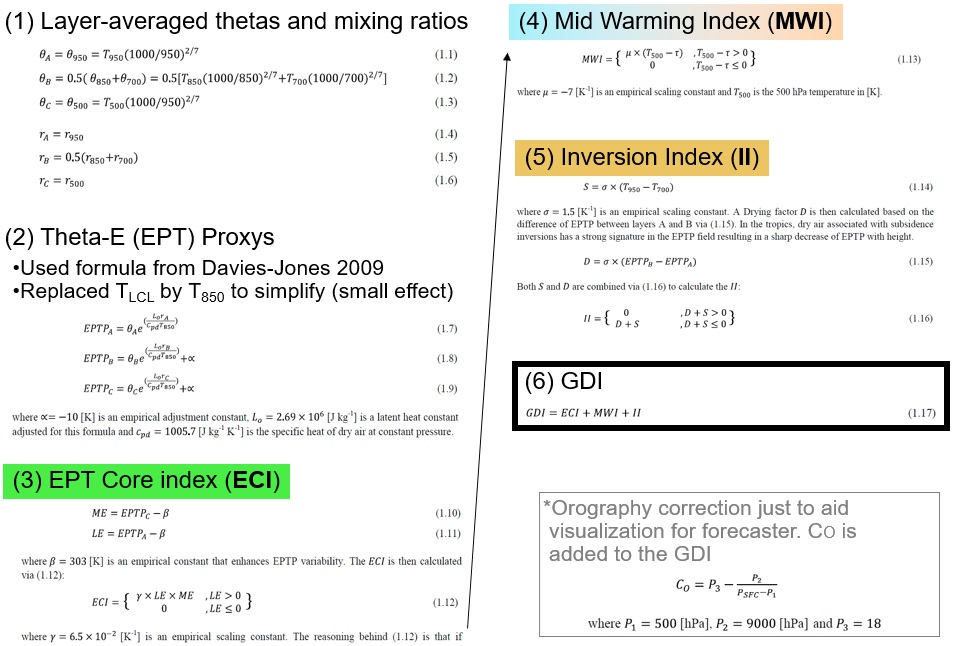
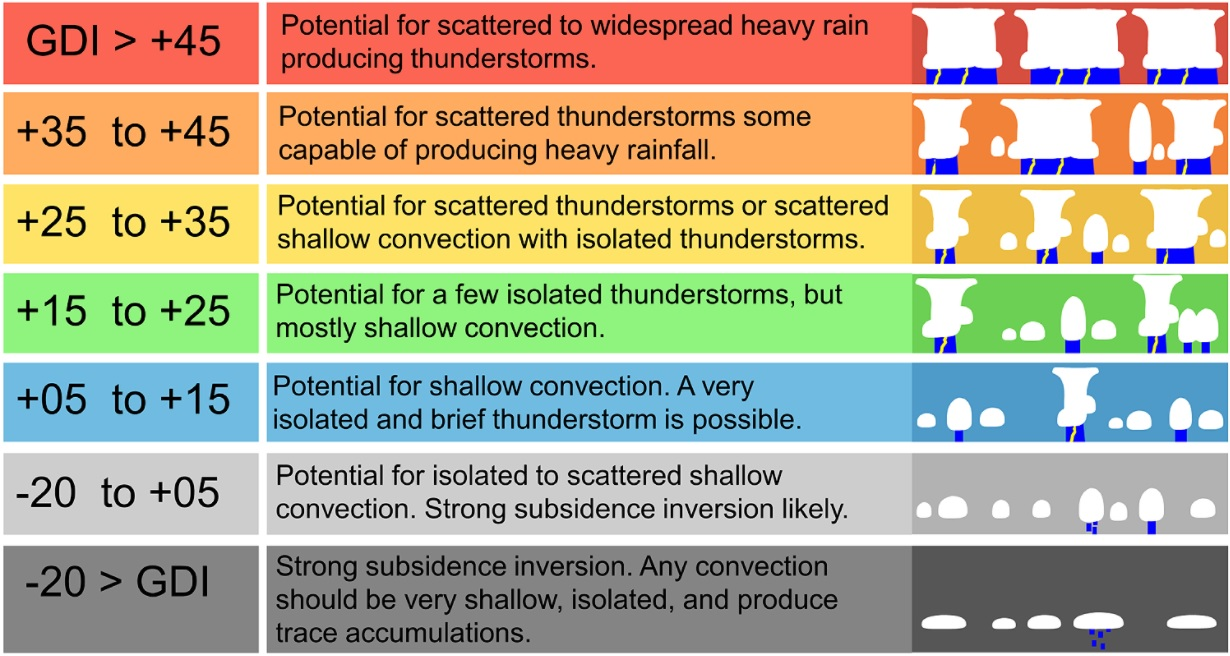

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWP Data Processing With Python - Script 18: Galvez Davison Index (GDI)
# Author: Diego Souza / HUGE THANKS TO JUAN AMIDES FIGUEROA (MARN EL SALVADOR) AND JOSE GALVEZ
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python
import math                                # Methematical Functions
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Read the surface pressure
sfcps = grib.select(name='Surface pressure')[0]

# Get information from the file
init  = str(sfcps.analDate)      # Init date / time
run   = str(sfcps.hour).zfill(2) # Run
ftime = str(sfcps.forecastTime)  # Forecast hour
valid = str(sfcps.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
sfcps, lats, lons = sfcps.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert the surface pressure to hectopascal
sfcps = sfcps / 100

#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 950 hPa
temp950 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 950)[0]

# Read the data for a specific region
temp950 = temp950.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 950 hPa
spfh950 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 950)[0]

# Read the data for a specific region
R950 = spfh950.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 850 hPa
temp850 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
temp850 = temp850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 850 hPa
spfh850 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
R850 = spfh850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 700 hPa
temp700 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
temp700 = temp700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 700 hPa
spfh700 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
R700 = spfh700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 500 hPa
temp500 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
temp500 = temp500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 500 hPa
spfh500 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
R500 = spfh500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Theta 950
T950 = ((temp950)*(pow((1000/950),(2/7))))

# Calculate the Theta 850
T850 = ((temp850)*(pow((1000/850),(2/7))))

# Calculate the Theta 700
T700 = ((temp850)*(pow((1000/700),(2/7))))

# Calculate the Theta 500
T500 = ((temp500)*(pow((1000/500),(2/7))))

#-----------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Layer-averaged thetas and mixing ratios
THETAA = T950
A1 = T850 + T700
THETAB = 0.5 * A1
THETAC = T500
RA = R950
C2 = R850 + R700
RB = 0.5 * C2
RC = R500

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Theta-E (EPT) Proxys
L0 = 2690000
alpha = -10
cpd = 1005.7
p1 = L0 * RA
p2 = L0 * RB
p3 = L0 * RC
p4 = cpd * T850
x1 = p1 / p4
x2 = p2 / p4
x3 = p3 / p4
y1 = np.exp(x1)
y2 = np.exp(x2)
y3 = np.exp(x3)
EPTPA = THETAA * y1
EPTPB = THETAB * y2 + alpha
EPTPC = THETAC * y3 + alpha

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the EPT Core Index (ECI)
beta = 303
ME = EPTPC - beta
LE = EPTPA - beta
gamma= 0.065

# Decide the value of the ECI
ECI = np.where(LE <= 0, 0, gamma * LE * ME)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Mid Warming Index (MWI)
tau = 263.15
mu = -7
calc1 = temp500 - tau

# Decide the value of the MWI
MWI = np.where(calc1 <= 0, 0, calc1 * mu)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Inversion Index (II)
sigma = 1.5
op1 = temp950 - temp700
S = sigma * op1
op2 = EPTPB - EPTPA
D = sigma * op2
calc2 = D + S

# Decide the value of the II
II = np.where(calc2 <= 0, D + S, 0)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Orography correction just to aid visualization for forecaster. Co is added to the GDI
pp1 = 500
pp2 = 9000
pp3 = 18
divisor = sfcps - pp1
division = pp2 / divisor
C0 = pp3 - division

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Galvez Davison Index - Indices with and without correction
GDI = ECI + MWI + II
GDIc = ECI + MWI + II + C0

# Smooth the contours
import scipy.ndimage
GDIc = scipy.ndimage.zoom(GDIc, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -30
data_max = 70
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create the color scale
colors = ["#323232", "#646464", "#737373", "#7e7e7e", "#909090", "#a3a3a3", "#b1b1b1", "#bcbcbc", "#bbc7cb", "#b2d2dd", "#90d5bb", "#55d065", "#5acf28", "#bad411", "#ffcc00", "#ffa900", "#fc8106", "#eb4722", "#d8133a", "#ac0a1d"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#800000')
cmap.set_under('#000000')

# Plot the contours
img1 = ax.contourf(lons, lats, GDIc, cmap=cmap, levels=levels, extend='both')
img2 = ax.contour(lons, lats, GDIc, colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='Galvez Davison Index', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Galvez Davison Index (GDI)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('image_18.png')

# Show the image
plt.show()

# Script 19: Plot de Satélite

Neste script vamos ver como baixar, reprojetar e plotar uma imagem do satélite GOES-16. Maiores detalhes no curso de "Processamento de Dados de Satélites", também no nosso Moodle.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 19 - Satellite Plot
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------

# Download the ABI file
file_ir = download_CMI(yyyymmddhhmn, 13, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Converts a CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-103.0, vmax=84, extent=img_extent, cmap=cmap, alpha=1.0)

# Define the color scale based on the channel
#colormap = "gray_r" # White to black for IR channels

# Plot the image
#img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.03, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/image_19.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


# Script 20: Plot de Modelo Numérico + Satélite (Exemplo 1)

Neste primeiro exemplo de plots de modelo numérico sobrepostos a imagens de de satélite, vamos utilizar plotar a altura geopotencial em 500 hPa sobreposta a imagem do canal 13. Neste exemplo, será utilizada uma imagem do GOES-R da data da execução do script (como fizemos para o download dos dados do GFS). Para maiores detalhes sobre o fragmento do script com o processamento da imagem de satélite (reprojeção, entre outros), verificar o material do curso de processamento de dados de satélite com Python, disponível no nosso Moodle.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 20 - Satellite + NWP Plot (Example 1)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------

# Download the ABI file
file_ir = download_CMI(yyyymmddhhmn, 13, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='Geopotential Height', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
#print('Init: ' + init + ' UTC')
#print('Run: ' + run + 'Z')
#print('Forecast: +' + ftime)
#print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
gh500, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to gpdm
gh500 = gh500 / 10

# Smooth the contours
import scipy.ndimage
gh500 = scipy.ndimage.zoom(gh500, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)

# Define de contour interval
data_min = 400
data_max = 600
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img2 = ax.contour(lons, lats, gh500, cmap='jet', linewidths=1.5, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'blue') # For the labels to have the same colors as the cmap, just omit the "colors" variable

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS Geopotential Height - 500 hPa (gpdm)', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/image_20.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


# Script 21: Plot de Modelo Numérico + Satélite (Exemplo 2)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 21 - Satellite + NWP Plot (Example 2)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------
# Get the Band 13 Data

# Download the file
file_ir = download_CMI(yyyymmddhhmn, 13, input)
#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
grb = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Get information from the file
init  = str(grb.analDate)      # Init date / time
run   = str(grb.hour).zfill(2) # Run
ftime = str(grb.forecastTime)  # Forecast hour
valid = str(grb.validDate)     # Valid date / time
#print('Init: ' + init + ' UTC')
#print('Run: ' + run + 'Z')
#print('Forecast: +' + ftime)
#print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
tp850, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert from K to °C
tp850 = tp850 - 273.15

# Smooth the contours
import scipy.ndimage
tp850 = scipy.ndimage.zoom(tp850, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)

# Define de contour interval
data_min = -20
data_max = 48
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = ax.contour(lons, lats, tp850, cmap='jet', linewidths=1.5, levels=levels)
ax.clabel(img3, inline=1, inline_spacing=0, fontsize='13',fmt = '%1.0f', colors= 'black') # For the labels to have the same colors as the cmap, just omit the "colors" variable

# Get the index of elements with value "0"
zero_value = int(np.where(levels == 0)[0])
img3.collections[zero_value].set_linewidth(4)
img3.collections[zero_value].set_color('black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS Temperature - 850 hPa (°C)', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/image_21.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


# Script 22: Plot de Modelo Numérico + Satélite (Exemplo 3)

Neste terceiro exemplo, vamos plotar mais de um campo de modelo (PSML + Espessura 1000-500 hPa), e também vamos ver como plotar simbolos de alta e baixa pressão.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 22 - Satellite + NWP Plot (Example 3)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
         txt1 = ax.annotate(symbol, xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color=color, size=24,
                clip_on=True, annotation_clip=True, horizontalalignment='center', verticalalignment='center',
                transform=ccrs.PlateCarree())

         txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                color=color, size=12, clip_on=True, annotation_clip=True, fontweight='bold', horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())

#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------

# Download the ABI file
file_ir = download_CMI(yyyymmddhhmn, 13, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
prmls = grib.select(name='Pressure reduced to MSL')[0]

# Get information from the file
init  = str(prmls.analDate)      # Init date / time
run   = str(prmls.hour).zfill(2) # Run
ftime = str(prmls.forecastTime)  # Forecast hour
valid = str(prmls.validDate)     # Valid date / time
#print('Init: ' + init + ' UTC')
#print('Run: ' + run + 'Z')
#print('Forecast: +' + ftime)
#print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
prmls, lats, lons = prmls.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to hPa
prmls = prmls / 100

#-----------------------------------------------------------------------------------------------------------

# Select the variable
hght_1000 = grib.select(name='Geopotential Height', typeOfLevel = 'isobaricInhPa', level = 1000)[0]

# Read the data for a specific region
hght_1000 = hght_1000.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Select the variable
hght_500 = grib.select(name='Geopotential Height', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
hght_500 = hght_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Calculate and smooth 1000-500 hPa thickness
thickness_1000_500 = hght_500 - hght_1000

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)

# Define de contour interval
data_min = 4900
data_max = 5900
interval = 20
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img2 = ax.contour(lons, lats, thickness_1000_500, cmap='seismic', linestyles='dashed', linewidths=1.0, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f')#, colors= 'black') # For the labels to have the same colors as the cmap, just omit the "colors" variable

# Get the index of elements with value "5400"
mid_value = int(np.where(levels == 5400)[0])
img2.collections[mid_value].set_linewidth(4)
img2.collections[mid_value].set_color('blue')

# Define de contour interval
data_min = 500
data_max = 1050
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = ax.contour(lons, lats, prmls, colors='black', linewidths=0.7, levels=levels)
ax.clabel(img3, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Use definition to plot H/L symbols
plot_maxmin_points(lons, lats, prmls, 'max', 50, symbol='H', color='b',  transform=ccrs.PlateCarree())
plot_maxmin_points(lons, lats, prmls, 'min', 25, symbol='L', color='r', transform=ccrs.PlateCarree())

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS PMSL (hPa) + 1000-500 hPa Thickness (m)', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/image_22.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


# Script 23: Plot de Modelo Numérico + Satélite (Exemplo 4)

Neste quarto exemplo, vamos plotar vetores de vento em 850 hPa sobrepostos a imagem de satélite.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 23 - Satellite + NWP Plot (Example 4)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------

# Download the ABI file
file_ir = download_CMI(yyyymmddhhmn, 9, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Get information from the file
init  = str(ucomp.analDate)      # Init date / time
run   = str(ucomp.hour).zfill(2) # Run
ftime = str(ucomp.forecastTime)  # Forecast hour
valid = str(ucomp.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------

# Select the variable
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Converts a CPT file to be used in Python
cpt = loadCPT('SVGAWVX_TEMP.cpt')
cmap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-112.15, vmax=77.00, extent=img_extent, cmap=cmap, alpha=1.0)

# Define de contour interval
data_min = -20
data_max = 48
interval = 4
levels = np.arange(data_min,data_max,interval)

# Plot the wind vectors
img3 = ax.quiver(lons[::4,::4], lats[::4,::4], ucomp[::4,::4], vcomp[::4,::4], color='white')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
#plt.colorbar(img3.lines, label='Wind Speed (kt)', extend='both', orientation='vertical', pad=0.03, fraction=0.05)
plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.03, fraction=0.05)

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 09 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS Wind Speed and Direction (250 hPa)', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/image_23.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


# Script 24: Plot de Modelo Numérico + Satélite - Composições RGB (Exemplo 5)

Neste quinto exemplo, vamos plotar dados de modelo sobrepostos a uma composição RGB (massa de ar).

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 24 - Satellite + NWP Plot (RGB)
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
from utilities import download_CMI                  # Our function for download
from utilities import reproject                     # Our function for reproject
from utilities import loadCPT                       # Import the CPT convert function
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        txt1 = ax.annotate(symbol, xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color=color, size=24,
                clip_on=True, annotation_clip=True, horizontalalignment='center', verticalalignment='center',
                transform=ccrs.PlateCarree())

        txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                color=color, size=12, clip_on=True, annotation_clip=True, fontweight='bold', horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())

#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------
# Download the ABI file
file_ir_8 = download_CMI(yyyymmddhhmn, 8, input)

# Download the ABI file
file_ir_10 = download_CMI(yyyymmddhhmn, 10, input)

# Download the ABI file
file_ir_12 = download_CMI(yyyymmddhhmn, 12, input)

# Download the ABI file
file_ir_13 = download_CMI(yyyymmddhhmn, 13, input)
#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir_8}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data_08 = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir_10}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data_10 = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir_12}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data_12 = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir_13}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data_13 = file.variables['Band1'][:]
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
# RGB Components
R = data_08 - data_10
G = data_12 - data_13
B = data_08

# Minimuns and Maximuns
Rmin = -26.2
Rmax = 0.6

Gmin = -43.2
Gmax = 6.7

Bmin = -29.25
Bmax = -64.65

R[R<Rmin] = Rmin
R[R>Rmax] = Rmax

G[G<Gmin] = Gmin
G[G>Gmax] = Gmax

B[B<Bmax] = Bmax
B[B>Bmin] = Bmin

# Choose the gamma
gamma = 1

# Normalize the data
R = ((R - Rmin) / (Rmax - Rmin)) ** (1/gamma)
G = ((G - Gmin) / (Gmax - Gmin)) ** (1/gamma)
B = ((B - Bmin) / (Bmax - Bmin)) ** (1/gamma)

# Create the RGB
RGB = np.stack([R, G, B], axis=2)
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
prmls = grib.select(name='Pressure reduced to MSL')[0]

# Get information from the file
init  = str(prmls.analDate)      # Init date / time
run   = str(prmls.hour).zfill(2) # Run
ftime = str(prmls.forecastTime)  # Forecast hour
valid = str(prmls.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
prmls, lats, lons = prmls.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to hPa
prmls = prmls / 100
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]


# Plot the image
img1 = ax.imshow(RGB, origin='upper', extent=img_extent, alpha=1.0)

# Define de contour interval
data_min = 990
data_max = 1050
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img2 = ax.contour(lons, lats, prmls, colors='cyan', linewidths=0.7, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'cyan')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Use definition to plot H/L symbols
plot_maxmin_points(lons, lats, prmls, 'max', 50, symbol='H', color='b',  transform=ccrs.PlateCarree())
plot_maxmin_points(lons, lats, prmls, 'min', 25, symbol='L', color='r', transform=ccrs.PlateCarree())

# Extract date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Airmass RGB ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + GFS PSML (hPa)', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/image_24.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()


# Script 25: Plot METAR

Neste exemplo, vamos baixar dados METAR do servidor THREDDS da UNIDATA.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 25 - METAR Plot
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------

# Adapted from: https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html

import matplotlib.pyplot as plt                                 # Plotting library
import cartopy, cartopy.crs as ccrs                             # Plot maps
import cartopy.io.shapereader as shpreader                      # Import shapefiles
import cartopy.feature as cfeature                              # Common drawing and filtering operations
import os                                                       # Miscellaneous operating system interfaces
import numpy as np                                              # Scientific computing with Python
import requests                                                 # HTTP library for Python
from datetime import timedelta, date, datetime                  # Basic Dates and time types
from metpy.calc import reduce_point_density                     # Provide tools for unit-aware, meteorological calculations
from metpy.io import metar                                      # Parse METAR-formatted data
from metpy.plots import current_weather, sky_cover, StationPlot # Contains functionality for making meteorological plots

#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
dir = "/content/Samples"; os.makedirs(dir, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Download the METAR File
date = datetime.today().strftime('%Y%m%d')
url = 'https://thredds-test.unidata.ucar.edu/thredds/fileServer/noaaport/text/metar'
file_name = 'metar_' + date + '_0000.txt'

# Sends a GET request to the specified url
myfile = requests.get(url + '//' + file_name)

# Download directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Download the file
open(dir + '//' + file_name, 'wb').write(myfile.content)

# METAR File
# https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html
data = metar.parse_metar_file(dir + '//' + file_name)

# Drop rows with missing winds
data = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Set up the map projection
proj = ccrs.PlateCarree()

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=proj)

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Change the DPI of the resulting figure. Higher DPI drastically improves the
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 255

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a minimum radius
point_locs = proj.transform_points(ccrs.PlateCarree(), data['longitude'].values, data['latitude'].values)
data = data[reduce_point_density(point_locs, 3)]

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#-----------------------------------------------------------------------------------------------------------
# Station Plot

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['present_weather'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

# Add a title
ax.set_title("METAR | " + date + " 00:00 UTC | UNIDATA THREDDS Data Server")

#-----------------------------------------------------------------------------------------------------------

# Save the image
plt.savefig(f'{output}/image_25.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()

# Script 26: METAR + Modelo

Neste exemplo, vamos sobrepor os dados METAR aos dados de modelo.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 26 - METAR + NWP Plot
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------

# Adapted from: https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html

import matplotlib.pyplot as plt                                 # Plotting library
import cartopy, cartopy.crs as ccrs                             # Plot maps
import cartopy.io.shapereader as shpreader                      # Import shapefiles
import cartopy.feature as cfeature                              # Common drawing and filtering operations
import os                                                       # Miscellaneous operating system interfaces
import numpy as np                                              # Scientific computing with Python
import requests                                                 # HTTP library for Python
from datetime import timedelta, date, datetime                  # Basic Dates and time types
from metpy.calc import reduce_point_density                     # Provide tools for unit-aware, meteorological calculations
from metpy.io import metar                                      # Parse METAR-formatted data
from metpy.plots import current_weather, sky_cover, StationPlot # Contains functionality for making meteorological plots
import pygrib                                                   # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files

#-----------------------------------------------------------------------------------------------------------

def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        txt1 = ax.annotate(symbol, xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color=color, size=24,
                clip_on=True, annotation_clip=True, horizontalalignment='center', verticalalignment='center',
                transform=ccrs.PlateCarree())

        txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                color=color, size=12, clip_on=True, annotation_clip=True, fontweight='bold', horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())

#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Select the variable
prmls = grib.select(name='Pressure reduced to MSL')[0]

# Get information from the file
init  = str(prmls.analDate)      # Init date / time
run   = str(prmls.hour).zfill(2) # Run
ftime = str(prmls.forecastTime)  # Forecast hour
valid = str(prmls.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
prmls, lats, lons = prmls.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to hPa
prmls = prmls / 100

#-----------------------------------------------------------------------------------------------------------

# Input and output directories
dir = "/content/Samples"; os.makedirs(dir, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Download the METAR File
date = datetime.today().strftime('%Y%m%d')
url = 'https://thredds-test.unidata.ucar.edu/thredds/fileServer/noaaport/text/metar'
file_name = 'metar_' + date + '_0000.txt'

# Sends a GET request to the specified url
myfile = requests.get(url + '//' + file_name)

# Download directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Download the file
open(dir + '//' + file_name, 'wb').write(myfile.content)

# METAR File
# https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html
data = metar.parse_metar_file(dir + '//' + file_name)

# Drop rows with missing winds
data = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Set up the map projection
proj = ccrs.PlateCarree()

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=proj)

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Change the DPI of the resulting figure. Higher DPI drastically improves the
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 255

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a minimum radius
point_locs = proj.transform_points(ccrs.PlateCarree(), data['longitude'].values, data['latitude'].values)
data = data[reduce_point_density(point_locs, 3)]

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Define de contour interval
data_min = 500
data_max = 1050
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img1 = ax.contour(lons, lats, prmls, colors='gray', linewidths=0.7, levels=levels)
ax.clabel(img1, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'gray')

# Use definition to plot H/L symbols
plot_maxmin_points(lons, lats, prmls, 'max', 50, symbol='H', color='b',  transform=ccrs.PlateCarree())
plot_maxmin_points(lons, lats, prmls, 'min', 25, symbol='L', color='r', transform=ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#-----------------------------------------------------------------------------------------------------------
# Station Plot

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data['present_weather'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

#-----------------------------------------------------------------------------------------------------------

ax.set_title("METAR + GFS PSML (hPa) | " + date + " 00:00 UTC")

# Save the image
plt.savefig(f'{output}/image_26.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()

# Script 27 - METAR + NWP + Satellite

Neste exemplo, vamos criar uma composição com dados METAR, dados de modelo e dados de satélite.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: Python and GOES-R Imagery: Script 27 - METAR + NWP + Satellite Plot
# Author: Diego Souza
#-----------------------------------------------------------------------------------------------------------

# Required modules
from netCDF4 import Dataset                                     # Read / Write NetCDF4 files
from osgeo import gdal                                          # Python bindings for GDAL
import matplotlib.pyplot as plt                                 # Plotting library
import cartopy, cartopy.crs as ccrs                             # Plot maps
import cartopy.io.shapereader as shpreader                      # Import shapefiles
import os                                                       # Miscellaneous operating system interfaces
import numpy as np                                              # Scientific computing with Python
from matplotlib import cm                                       # Colormap handling utilities
from datetime import timedelta, date, datetime                  # Basic Dates and time types
from utilities import download_CMI                              # Our function for download
from utilities import reproject                                 # Our function for reproject
from utilities import loadCPT                                   # Import the CPT convert function
from metpy.calc import reduce_point_density                     # Provide tools for unit-aware, meteorological calculations
from metpy.io import metar                                      # Parse METAR-formatted data
from metpy.plots import current_weather, sky_cover, StationPlot # Contains functionality for making meteorological plots
import pygrib                                                   # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')                   # Ignore GDAL warnings

#-----------------------------------------------------------------------------------------------------------

def plot_maxmin_points(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    """
    This function will find and plot relative maximum and minimum for a 2D grid. The function
    can be used to plot an H for maximum values (e.g., High pressure) and an L for minimum
    values (e.g., low pressue). It is best to used filetered data to obtain  a synoptic scale
    max/min value. The symbol text can be set to a string value and optionally the color of the
    symbol and any plotted value can be set with the parameter color
    lon = plotting longitude values (2D)
    lat = plotting latitude values (2D)
    data = 2D data that you wish to plot the max/min symbol placement
    extrema = Either a value of max for Maximum Values or min for Minimum Values
    nsize = Size of the grid box to filter the max and min values to plot a reasonable number
    symbol = String to be placed at location of max/min value
    color = String matplotlib colorname to plot the symbol (and numerica value, if plotted)
    plot_value = Boolean (True/False) of whether to plot the numeric value of max/min point
    The max/min symbol will be plotted on the current axes within the bounding frame
    (e.g., clip_on=True)
    """
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):
        txt1 = ax.annotate(symbol, xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color=color, size=24,
                clip_on=True, annotation_clip=True, horizontalalignment='center', verticalalignment='center',
                transform=ccrs.PlateCarree())

        txt2 = ax.annotate('\n' + str(np.int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                color=color, size=12, clip_on=True, annotation_clip=True, fontweight='bold', horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())

#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-93.0, -60.00, -25.00, 18.00]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

# Datetime to process (today in this example, to match the GFS date)
date = datetime.today().strftime('%Y%m%d')
yyyymmddhhmn = date + '0000'

#-----------------------------------------------------------------------------------------------------------

# Download the ABI file
file_ir = download_CMI(yyyymmddhhmn, 13, input)

#-----------------------------------------------------------------------------------------------------------
# Variable
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_ir}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds_cmi = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds_cmi = (ds_cmi * scale + offset) - 273.15

# Reproject the file
filename_ret = f'{output}/IR_{yyyymmddhhmn}.nc'
reproject(filename_ret, img, ds_cmi, extent, undef)

# Open the reprojected GOES-R image
file = Dataset(filename_ret)

# Get the pixel values
data = file.variables['Band1'][:]

#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
grib = pygrib.open("Samples/gfs.t00z.pgrb2.0p50.f000")

# Select the variable
prmls = grib.select(name='Pressure reduced to MSL')[0]

# Get information from the file
init  = str(prmls.analDate)      # Init date / time
run   = str(prmls.hour).zfill(2) # Run
ftime = str(prmls.forecastTime)  # Forecast hour
valid = str(prmls.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
prmls, lats, lons = prmls.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to hPa
prmls = prmls / 100

#-----------------------------------------------------------------------------------------------------------

# Input directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Download the METAR File
date = datetime.today().strftime('%Y%m%d')
url = 'https://thredds-test.unidata.ucar.edu/thredds/fileServer/noaaport/text/metar/'
file_name = 'metar_' + date + '_0000.txt'

# Sends a GET request to the specified url
myfile = requests.get(url + '//' + file_name)

# Download the file
open(dir + '//' + file_name, 'wb').write(myfile.content)

# METAR File
# https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html
data_metar = metar.parse_metar_file(dir + '//' + file_name)

# Drop rows with missing winds
data_metar = data_metar.dropna(how='any', subset=['wind_direction', 'wind_speed'])

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(15,15))

# Set up the map projection
proj = ccrs.PlateCarree()

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=proj)

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Change the DPI of the resulting figure. Higher DPI drastically improves the
# look of the text rendering.
plt.rcParams['savefig.dpi'] = 255

# Use the Cartopy map projection to transform station locations to the map and
# then refine the number of stations plotted by setting a minimum radius
point_locs = proj.transform_points(ccrs.PlateCarree(), data_metar['longitude'].values, data_metar['latitude'].values)
data_metar = data_metar[reduce_point_density(point_locs, 3)]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Plot the image
img1 = ax.imshow(data, origin='upper', vmin=-80, vmax=60, extent=img_extent, cmap=colormap, alpha=1.0)

# Define de contour interval
data_min = 500
data_max = 1050
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img2 = ax.contour(lons, lats, prmls, colors='white', linewidths=0.7, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'gray')

# Use definition to plot H/L symbols
plot_maxmin_points(lons, lats, prmls, 'max', 50, symbol='H', color='b',  transform=ccrs.PlateCarree())
plot_maxmin_points(lons, lats, prmls, 'min', 25, symbol='L', color='r', transform=ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#-----------------------------------------------------------------------------------------------------------
# Station Plot

# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data_metar['longitude'].values, data_metar['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data_metar['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data_metar['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data_metar['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location. This uses the codes made above and
# uses the `sky_cover` mapper to convert these values to font codes for the
# weather symbol font.
stationplot.plot_symbol('C', data_metar['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center, using the
# `current_weather` mapper to convert symbols to the right glyphs.
stationplot.plot_symbol('W', data_metar['present_weather'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data_metar['eastward_wind'].values, data_metar['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data_metar['station_id'].values)

#-----------------------------------------------------------------------------------------------------------

# Extract the date from the satellite data
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC' + ' + METAR + GFS PSML (hPa)', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# Save the image
plt.savefig(f'{output}/image_27.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()

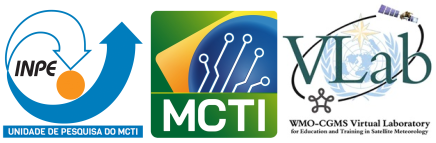

### **Contato:** Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)

Para referenciar este trabalho, utilizar:
https://github.com/diegormsouza/NWP-Python-Jul-2021